# Assignment 1

## Objective of this assignment
The objective is to get acquainted with the Python language, with emphasis on its scientific and numerical extensions, how data can be imported from other data sources, linear algebra basics that is needed in this course, visualization using principal component analysis (PCA) and the concept of similarity. Upon completing this exercise it is expected that you:

- Understand how data can be represented as vectors and matrices in numerical Python (NumPy).
- Can apply and interpret principal component analysis (PCA) for data visualization.
- Understand the various measures of similarity such as Jaccard and Cosine similarity and apply similarity measures to query for similar observations.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a seperate header (not hidden some-where in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.

## Advised Reading and Exercise Material
**The following on-line materials are recommended:**

- <http://docs.python.org/tutorial> - Introduction into Python environment, syntax and data structures. Recommended reading - sections 1, 2, 3, 4 and 5.
- <http://www.scipy.org/Tentative_NumPy_Tutorial> - Tutorial introducing the scientific computing in Python, array and matrix operations, indexing and slicing matrices.
- <http://www.scipy.org/NumPy_for_Matlab_Users> - Useful reference to scientific computing in Python if you have previous experience with MATLAB programming.
- <https://www.datacamp.com/courses/intro-to-python-for-data-science> - Simple introduction to Data Science using Python.
- <http://matplotlib.sourceforge.net> - Documentation and examples related to matplotlib module, which we shall use extensively through the course to visualize data and results.
- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, {\em Introduction to Data Mining}, sections 2.1-2.3 + (A) + B.1
- <http://http://www.youtube.com/course?list=ECEA1FEF17E1E5C0DA> - Series of video tutorials covering basics of Python programming.
- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, {\em Introduction to Data Mining}, sections 2.4 + 3.1-3.2 + C.1-C.2


## 1.1 Python and Linear Algebra basics

**For this course we advise to only use NumPy ndarrays ndarrays to represent vectors and matrices. The numpy.matrix data type, although intuitive, is less supported and uses operators for multiplication differently. This means that you can't perform matrix multiplications symbollically, but that you will have to use functions from the NumPy library!** 

**1.1.1** (0.3 points) Generate (and print) the following vectors using functions from the *NumPy* package in Python: 
*Note: You do not have to print column vectors as columns!*

\begin{equation}
     \textbf{x} = \begin{pmatrix} 
         6 \\
         7 \\
         8 \\
         9 \\
         10 \\
         11 \\
         12
       \end{pmatrix}
     \textbf{y} = \begin{pmatrix} 
         3 \\
         7 \\
         11 \\
         15 \\
         19 \\
         23 \\
         27
       \end{pmatrix}
     \textbf{w} = \begin{pmatrix} 
         1 \\
         1 \\
         0 \\
         0.5 \\
         1 \\
         1.5 \\
         2 \\
         0 \\
         0 
       \end{pmatrix}
     \textbf{s} = \begin{pmatrix}
         100 \\
         98.8 \\
         97.6 \\
         96.4 \\
         95.2
       \end{pmatrix} 
     \textbf{z} = \begin{pmatrix}
         0.7 \\
         1.0 \\
         1.3 \\
         1.6 \\
         1.9 \\
         2.2 \\
         2.5 \\
         2.8
       \end{pmatrix}
  \end{equation}



In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import pi
from scipy.linalg import svd
from itertools import combinations
from Toolbox.simfaces import simfaces
from Toolbox.similarity import similarity

In [2]:
x = np.array([6, 7, 8, 9, 10, 11, 12])
y = np.array([3, 7, 11, 15, 19, 23, 27])
w = np.array([1, 1,0, .5,1, 1.5, 2, 0, 0])
s = np.array([100, 98.8, 97.6, 96.4, 95.2])
z = np.array([.7, 1, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8])

print(x)
print(y)
print(w)
print(s)
print(z)

[ 6  7  8  9 10 11 12]
[ 3  7 11 15 19 23 27]
[1.  1.  0.  0.5 1.  1.5 2.  0.  0. ]
[100.   98.8  97.6  96.4  95.2]
[0.7 1.  1.3 1.6 1.9 2.2 2.5 2.8]


Then compute the following operations:
> a. (0.2 points) **v** = 3**x** + **y**

In [3]:
v = 3 * x + y
print(v)

[21 28 35 42 49 56 63]


> b. (0.2 points) Compute the dot product between **x** and **y** and name it **q**

In [4]:
q = np.dot(x, y)
print(q)

1057


> c. (0.2 points) **t** = pi(**s** + 4) (element wise multiplication)

In [5]:
t = pi * (s + 4)
print(t)

[326.72563597 322.95572479 319.1858136  315.41590242 311.64599124]


> d. (0.2 points) **z** = **z** - 1

In [6]:
z -= 1
print(z)

[-0.3  0.   0.3  0.6  0.9  1.2  1.5  1.8]


> e. (0.2 points) replace some values of x, such that the last three values in the vector are 4

In [7]:
np.put(x, [4,5,6], [4,4,4])
print(x)

[6 7 8 9 4 4 4]


> f. (0.2 points) **r** = 2**w** - 5

In [8]:
r = 2 * w - 5
print(r)

[-3. -3. -5. -4. -3. -2. -1. -5. -5.]


**1.1.2** (0.25 points) Generate these matrices:

\begin{equation}
     \textbf{M} = \begin{pmatrix} 
         1 & 2 & 3 \\
         6 & 8 & 4 \\
         6 & 7 & 5          
         \end{pmatrix}
     \textbf{N} = \begin{pmatrix} 
         4 & 6 \\
         7 & 2 \\
         5 & 1
         \end{pmatrix}
     \textbf{P} = \begin{pmatrix} 
         2 & 5 \\
         5 & 5 
         \end{pmatrix}   
\end{equation}

Afterwards try and compute the operations for subquestions *a* up to and including *e* and print the resulting matrix. If some operations yield errors, give the reason as to why that happens.

*A hint: NumPy has functions for matrix operations you can, and should, use!*

In [9]:
M = np.array([[1,2,3], [6,8,4], [6,7,5]])
N = np.array([[4,6], [7,2], [5,1]])
P = np.array([[2,5], [5,5]])

print(M)
print(N)
print(P)

[[1 2 3]
 [6 8 4]
 [6 7 5]]
[[4 6]
 [7 2]
 [5 1]]
[[2 5]
 [5 5]]


> a. (0.2 points) **A** = **MN** + **N**

In [10]:
A = np.matmul(M, N) + N
print(A)

[[ 37  19]
 [107  58]
 [103  56]]


> b. (0.2 points) **B** = **N**<sup>T</sup>**M**

In [11]:
B = np.matmul(np.transpose(N), M)
print(B)

[[76 99 65]
 [24 35 31]]


> c. (0.2 points) **C** = **P**<sup>-1</sup> + **P**

In [12]:
C = np.linalg.inv(P) + P
print(C)

[[1.66666667 5.33333333]
 [5.33333333 4.86666667]]


> d. (0.2 points) **D** = **AC**(**C** + **B**)

In [13]:
# D = np.matmul(np.matmul(A, C), (C + B))
# print(D)

print('C is a {0} matrix and B is a {1} matrix so they cannot be added.'.format(C.shape, B.shape))

C is a (2, 2) matrix and B is a (2, 3) matrix so they cannot be added.


> e. (0.2 points) Compute the eigenvalues and eigenvectors of **M**, **N**, and **P** (and print them).

In [14]:
wM, vM = np.linalg.eig(M)
# wN, vN = np.linalg.eig(N)
wP, vP = np.linalg.eig(P)

print('Eigenvalues of M: {0}\nEigenvectors of M:\n{1}\n'.format(wM, vM))
print('N has no eigenvalues or -vectors because it is not a square matrix.\n')
print('Eigenvalues of P: {0}\nEigenvectors of P:\n{1}\n'.format(wP, vP))

Eigenvalues of M: [14.26208735 -1.26208735  1.        ]
Eigenvectors of M:
[[-0.25759308 -0.84234218  0.51507875]
 [-0.68324439  0.38109032 -0.71318597]
 [-0.68324439  0.38109032  0.47545731]]

N has no eigenvalues or -vectors because it is not a square matrix.

Eigenvalues of P: [-1.72015325  8.72015325]
Eigenvectors of P:
[[-0.80229293 -0.59693053]
 [ 0.59693053 -0.80229293]]



## 1.2 Principal Component Analysis

**1.2.1** many experimenters have a habit of using Microsoft Excel as their tool to record measurements from experiments. Fortunately Python can read Excel files. Various methods exist, of which the use of the Python library Pandas is arguably one of the easiest for the purpose of Data Mining.

The data used in this exercise is based on data from a chemical sensor obtained from the NanoNose project[1]. The data contains 8 sensors, named by the letters A-H, measuring the concentration of Water, Ethanol, Acetone, Heptane and Pentanol injected into a small gas chamber. The data will be represented in matrix form such that each column contains the 8 sensor measurements (i.e., sensor A-H) of the various compounds injected into the gas chamber.
> a. (0.2 points) Inspect the nanonose.xls file in the Data folder and make sure you understand how the data is stored in Excel.

> *Load the data in python using the Pandas library (use the read_excel() function). Make sure you read some of the Pandas documentation! Especially slicing, indexing and dropping are useful commands*

> *make sure to inspect the data first! You should cut out some rows and columns! You can easily inspect the structure of the Pandas dataframe using the head() function.*

> *Finally use the as_matrix() function to cast the Pandas dataframe to a NumPy array. Note: counterintuitively, this yields an object of type: numpy.ndarray, not of type numpy.matrix!*

In [15]:
df = pd.read_excel('Data/nanonose.xls')
df = df.drop(0).drop(['Nanonose', 'Unnamed: 2'], axis=1)
df = df.rename(columns={'Unnamed: 1': 'CONC'})
X = np.array(df.values, dtype=np.double)

df.head()

,CONC,A,B,C,D,E,F,G,H
1,9200,95.5,21.0,6.0,11.942308,64.134615,21.498560,5.567840,1.174135
2,9200,94.5,17.0,5.0,5.484615,63.205769,19.658560,4.968000,1.883444
3,9200,92.0,16.0,3.0,11.057692,62.586538,19.813120,5.192480,0.564835
4,4600,53.0,7.5,2.5,3.538462,35.163462,6.876207,1.641724,0.144654
5,4600,51.0,7.5,2.5,4.865385,34.057692,6.757241,1.613966,0.059663


> b. (0.3 points) The data resides in what can be seen as an 8-dimensional space. Each dimension (column), corresponds to one of the 8 NanoNose sensors. Multidimensional (>3) data is hard to visualize, as we are unable to plot that many dimensions simultaneously.

> Using the matplotlib library, plot the attributes A and B against each other. After you have plotted A against B, also plot a few other combinations of attributes. Plot at least 4 different combinations. 

> *Do not forget to label your axes and add a figure description!*

> NOTE: If you want to plot inside the Jupyter notebook use the following command after you imported the library: 
*%matplotlib inline* 

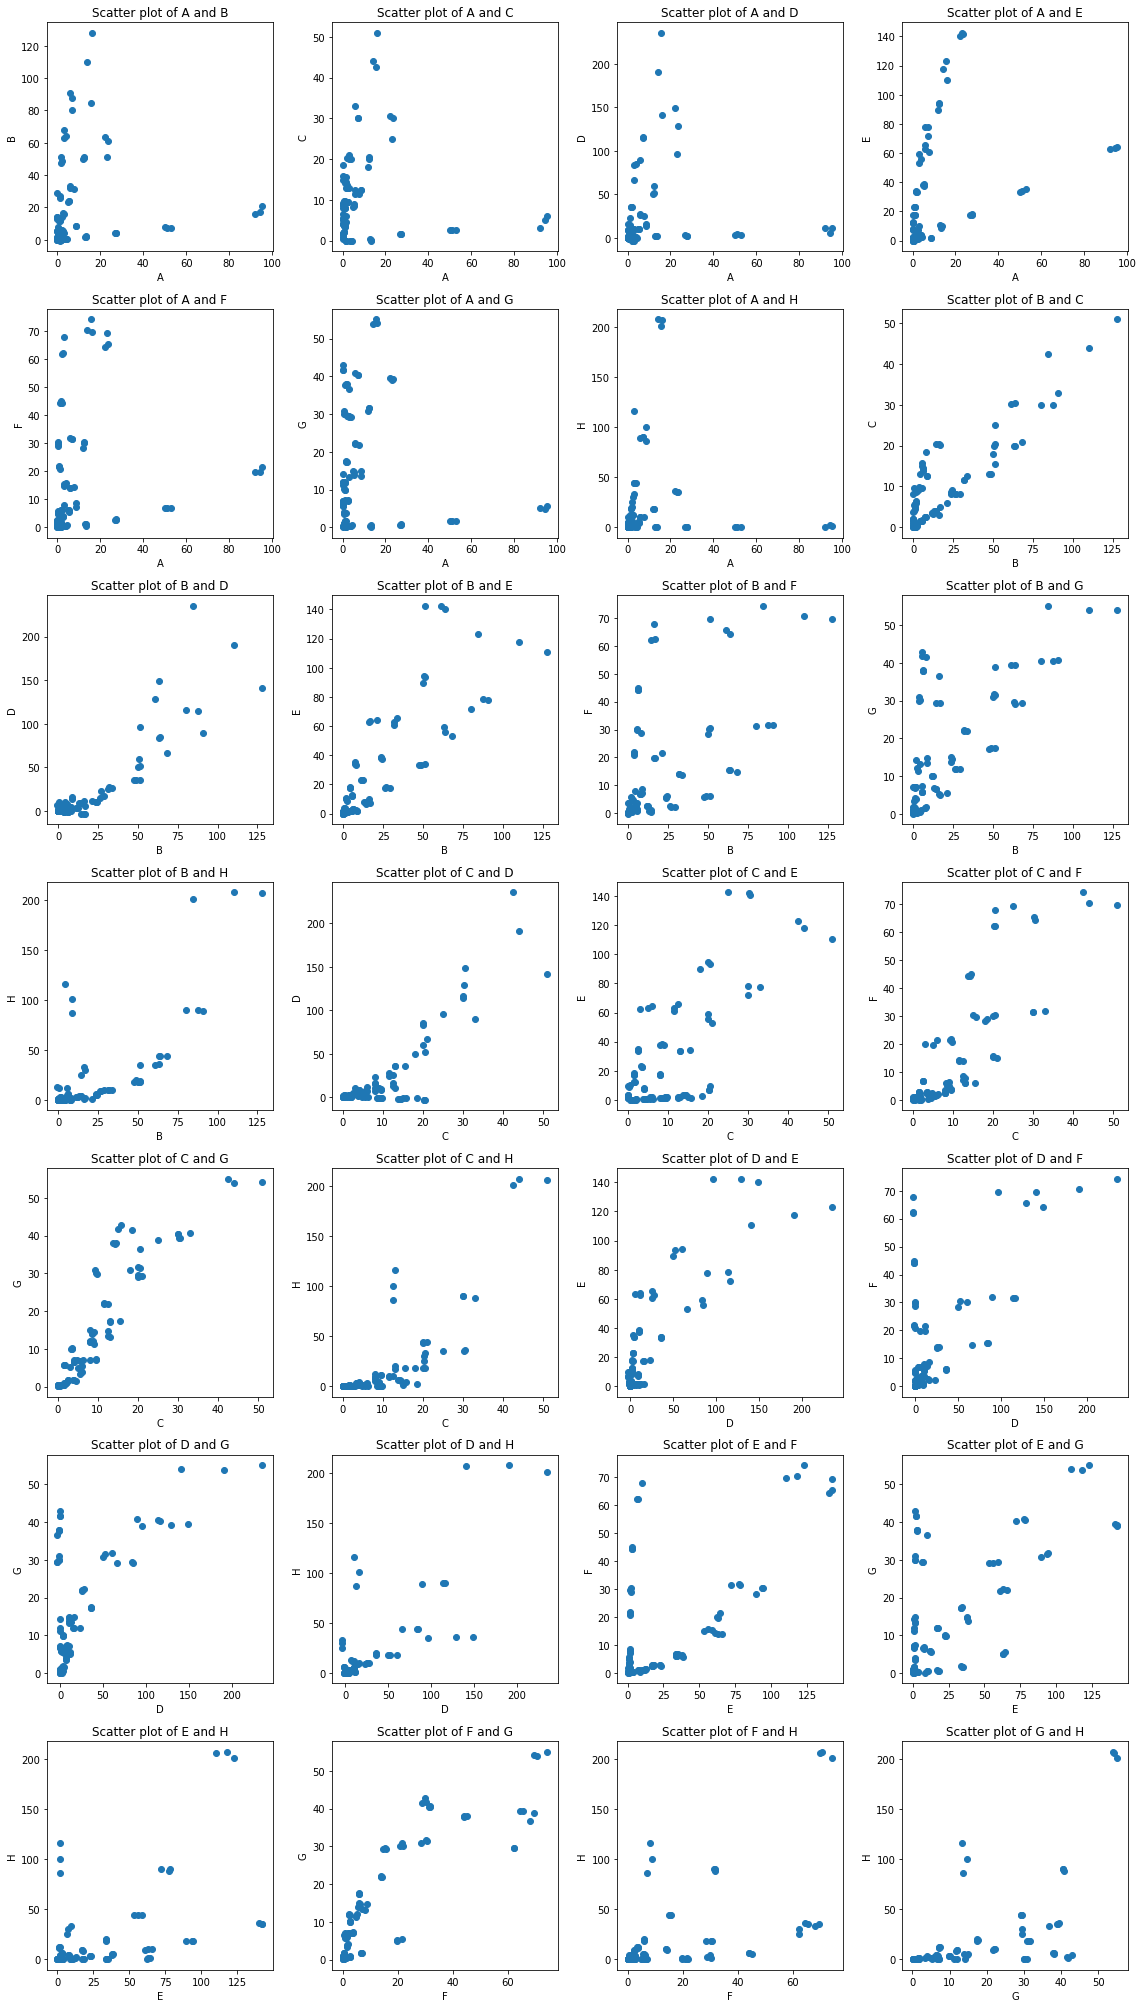

In [16]:
f = plt.figure(figsize=(16,28))
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

for i, (x, y) in enumerate(combinations(range(1,9), 2)):
    ax = f.add_subplot(7, 4, i+1)
    ax.scatter(X[:,x], X[:,y])
    
    ax.set_title('Scatter plot of {0} and {1}'.format(labels[x-1], labels[y-1]))
    ax.set_xlabel(labels[x-1])
    ax.set_ylabel(labels[y-1])

plt.tight_layout()
plt.show()


1.2.2 Principal Component Analysis, more commonly known as PCA, can be cleverly used to better visualize high dimensional data. 

> a. (1 point) Explain what PCA is and when it can be used. Make sure to provide an in-depth explanation and note what the drawbacks and limitations are.

Principal component analysis is a way to show variation and bring out strong patterns in datasets. It is often used to make data easy to explore and visualize. PCA is easy to interpret and is not sensitive to scale effects. But PCA is only useful for data that is linearly correlated, if the correlation is in, for instance, a spiral; PCA is not good enough. Also, because data is not normalized, if you change the scale of just some of the variables in your data set, you will get very different results after applying PCA.

To apply PCA we must first mean center the data. mean centering means that the mean value for an attribute is subtracted from that attribute. 

> b. (0.5 points) Why do we first need to mean center the data before applying PCA?

Mean centering is necessary for performing PCA, because the first principal component describes the direction of maximum variance. If mean subtraction is not performed, the first principal component might correspond to the mean of the data.

In practice, applying PCA comes down to a series of matrix operations, this is useful, as matrix operations can be applied with little effort and can be computed in relatively little time.

The given data **X**, must first be mean centered. This can be easily done by calculating a row vector **μ** containing the mean values of each attribute and then subtracting it from **X** (**Y** = **X** - **1μ**, where **1** is a column vector of size **N** x 1, with N indicating the number of observations in the original data).

Then, the Singular Value Decomposition, or SVD, of **Y**, the mean centered data, can be calculated. **Y** = **USV**<sup>T</sup>. In practice, this is often done using the numpy.linalg.svd() function.

Using SVD on **Y** yields a series of vectors which can be used to project the data onto specific Principal Components (PCs). The entire dataset can be projected onto the Principal Components by multiplying **Z** = **Y\*V**, where **Z** indicates the projected data. Alternatively, one could project onto just a subset of all the PCs by indexing in the multiplication. For example: **Z** = **Y\*V[:,1]** would yield the projection of the data onto the first PC.

> c. (1 point)  Apply PCA (using the aforementioned method) on the Nanonose data and visualize a scatterplot of the projection of the data onto the first two PCs.

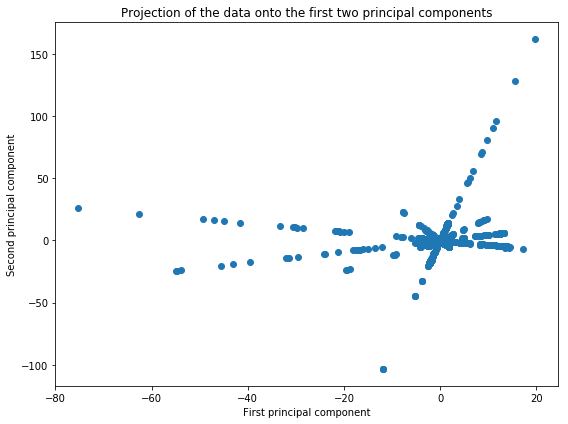

In [17]:
mu = X.mean(axis=0)
Y = X - mu
U, S, V = svd(Y)
Z = lambda x: Y * V[:,x]

plt.figure(figsize=(8,6))
plt.title('Projection of the data onto the first two principal components')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.scatter(Z(1), Z(2))
plt.tight_layout()
plt.show()

> d. (1 point) Alternatively, one could use EigenValue Decomposition, EVD, instead of SVD. What are the similarities and differences between SVD and EVD? Can both be applied in each case?

EVD uses only one basis, the eigenvectors, while SVD uses two different basis, the left and right singular vectors. Every matrix has a SVD. On the other hand, not even every square matrix has an eigendecomposition. So SVD can always be applied, but EVD can't.

PCA attempts to explain as much of the variance in data with as few PCs as possible. The variance explained by each of the PCs **m** can be calculated using the following formula: 
$\rho_m = 1 - \frac{\|{Y} - {u}_m s_{mm} {v}_m^T\|^2_F}{\|{Y}\|^2_F} = \frac{s_{mm}^2}{\displaystyle \sum_{m'=1}^M s^2_{m'm'}}$

Which indicates that the variation $\rho$ for a given **m** can be calculated by dividing the squared singular value of component **m** by the sum of all squared singular values. 
> e. (1 point) Calculate the row vector $\rho$ containing all values of $\rho$ for all PCs **m**. Create a bar plot with the variance explained on the Y axis and the number of the PC on the X axis. 

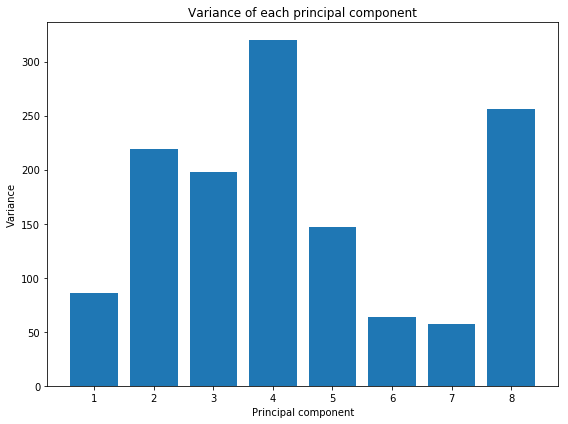

In [18]:
rho = [np.var(Z(i)) for i in range(1,9)]

plt.figure(figsize=(8,6))
plt.title('Variance of each principal component')
plt.xlabel('Principal component')
plt.ylabel('Variance')

plt.bar(range(1,9), rho)
plt.tight_layout()
plt.show()

> f. (0.5 points) How much of the variance is explained by the first three PCs?

In [19]:
var = rho[0] + rho[1] + rho[2]
print('Variance explained by first three principal components: {0:.2f}'.format(var))

Variance explained by first three principal components: 503.17


The columns of **V** indicate the exact projection of the data onto the PCs. In a way, a PC is nothing other than a linear combination of the original attributes. 
> g. (0.5 points) Which attributes are primarily represented by the first PC? What would cause an observation to have a large negative/positive projection onto the second principal component?

In [20]:
print(V[1:,1])

[-0.22703881 -0.69856801  0.42450739  0.09323475 -0.47853765  0.16649556
 -0.11467446 -0.04107977]


Attribute B is represented the most by the first principal component. Attributes C and E are also quite well represented by the first principal component. If an observarion has an unusually high or low representation in a principal component then it will cause the observation to have a large positive or negative projection respectively onto the next principal component.

## 1.3 Similarity measures

We will use a subset of the data on wild faces described by Berg in 2005 transformed to a total
of 1000 gray scale images of size 40x40 pixels, we will attempt to find faces in the
data base that are the most similar to a given query face. To measure similarity we
will consider the following measures: SMC, Jaccard, Cosine, ExtendedJaccard, and
Correlation. These measures of similarity are described in *Introduction to Data Mining*, page 73-77 and are given by

\begin{eqnarray*}
\textrm{SMC}({x},{y}) & = & \frac{\textrm{Number of matching attribute values}}{\textrm{Number of attributes}} \\
\textrm{Jaccard}({x},{y}) & = & \frac{\textrm{Number of matching presences}}{\textrm{Number of attributes not involved in 00 matches}} \\
\textrm{Cosine}({x},{y}) & = & \frac{{x}^T {y}}{\|{x}\| \|{y}\|} \\
\textrm{ExtendedJaccard}({x},{y}) & = & \frac{{x}^T {y}}{\|{x}\|^2 + \|{y}\|^2 - {x}^T {y}} \\
\textrm{Correlation}({x},{y}) & = & \frac{\textrm{cov}({x},{y})}{\textrm{std}({x}) \textrm{std}({y})}
\end{eqnarray*}
where $\textrm{cov}({x},{y})$ denotes the covariance between ${x}$ and ${y}$ and $\textrm{std}({x})$ denotes the standard deviation of ${x}$.

Notice that the SMC and Jaccard similarity measures only are defined for binary
data, i.e., data that takes values in $\{0,1\}$. As the data we analyze is non-binary,
we will transform the data to be binary when calculating these two measures of
similarity by setting
$x_i = \left\{ \begin{array}{ll} 0 & \textrm{if~} x_i < \textrm{median}({x}) \\
                                1 & \textrm{otherwise.} \end{array} \right.$
                                
### 1.3.1
> (0.5 points) Inspect and run the simfaces function from the Toolbox. The function loads the CBCL face database, computes the similarity between a selected query image and all others, and display the query image, the 5 most similar images, and the 5 least similar images. The value of the used similarity measure is shown below each image. Try changing the query image and the similarity measure and see what happens. Which similarity measures produce similar results? Which one gives the best result? Why?

> Give a quick overview of the settings (image number and similarity measure) for each time you run the script! Remember to leave all results open!

Measure: smc


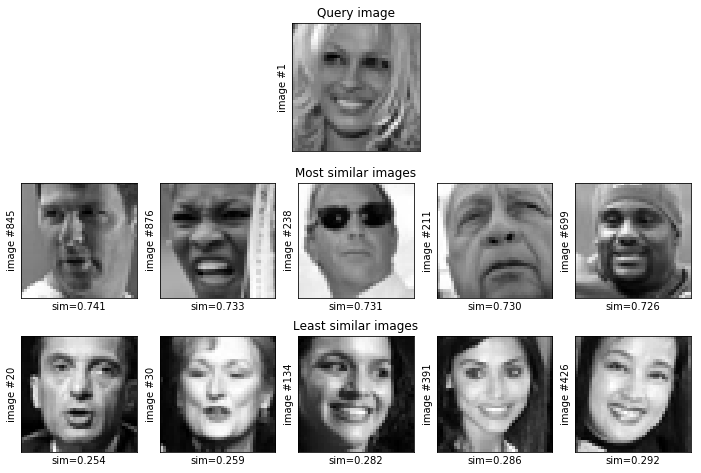

Measure: jac


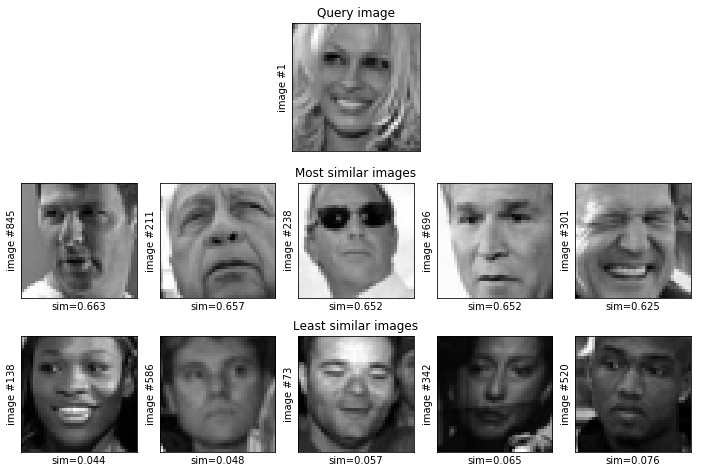

Measure: cos


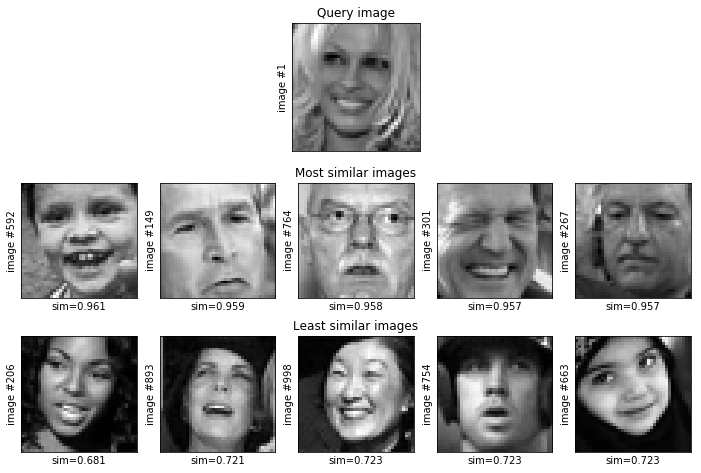

Measure: ext


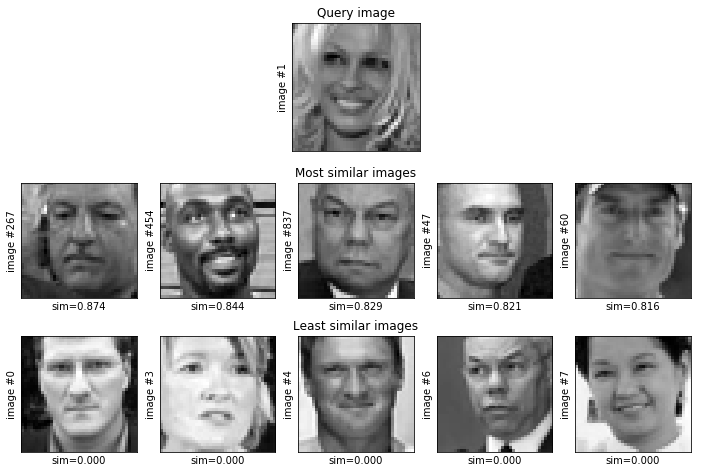

Measure: cor


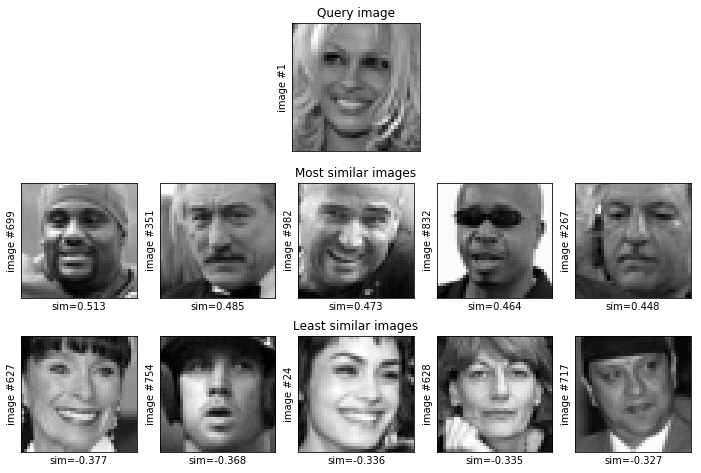

In [23]:
for measure in ['smc', 'jac', 'cos', 'ext', 'cor']:
    print('Measure:', measure)
    simfaces(1, measure)

<pre>
SMC:  Most: .741  Least:  .254
JAC:  Most: .663  Least:  .044
COS:  Most: .961  Least:  .681
EXT:  Most: .874  Least:  .000
COR:  Most: .513  Least: -.377
</pre>
Cosine provides the most similar image. Extended Jaccard has a higher difference between the most and least similar images. Therefor Extended Jaccard is the best, because it provides the best overall results.


> (0.75 points) We will investigate how scaling and translation impact the following three
similarity measures: Cosine, ExtendedJaccard, and Correlation. Let $\alpha$ and $\beta$ be two constants. Using Python, calculate the following similarity measures, and check if the statements below are correct.

\begin{eqnarray*}
\textrm{Cosine}(\alpha{x},{y}) & = & \textrm{Cosine}({x},{y}) \\
\textrm{ExtendedJaccard}(\alpha{x},{y}) & = & \textrm{ExtendedJaccard}({x},{y}) \\
\textrm{Correlation}(\alpha{x},{y}) & = & \textrm{Correlation}({x},{y}) \\
\textrm{Cosine}(\beta + {x},{y}) & = & \textrm{Cosine}({x},{y}) \\
\textrm{ExtendedJaccard}(\beta + {x},{y}) & = & \textrm{ExtendedJaccard}({x},{y}) \\
\textrm{Correlation}(\beta + {x},{y}) & = & \textrm{Correlation}({x},{y})
\end{eqnarray*}

> Type help similarity, or study similarity.py, to learn about the function that is used to compute the similarity measures. Do not forget to also import similarity.py!

> Even though a similarity measure is theoretically invariant e.g.\ to scaling, it might not be exactly invariant numerically.

> Do not forget to also provide an explanation in addition to the calculations!


In [24]:
for measure in ['cos', 'ext', 'cor']:
    a, b, x, y = random.sample(range(1,10), 4)
    
    for n in [a * x, b + x]:
        print('{0}({1}, {2}) = {0}({3}, {2}): {4}'.format(measure, n, y, x,
              'True' if similarity(n, y, measure) == similarity(x, y, measure) else 'False'))

cos(42, 9) = cos(6, 9): True
cos(9, 9) = cos(6, 9): True
ext(4, 7) = ext(4, 7): True
ext(12, 7) = ext(4, 7): False
cor(21, 8) = cor(7, 8): False
cor(11, 8) = cor(7, 8): False


Scaling does not matter for the cosine measure, for the extended jaccard and correlation measure is does make a difference.

## Turning in the Jupyter Notebook
Do not forget to read the provided guidelines regarding the expectations and grading of your report. You can find these on Blackboard!

## References
[1] Tommy S Alstrøm, Jan Larsen, Claus H Nielsen, and Niels B Larsen. Data-driven
modeling of nano-nose gas sensor arrays. In SPIE Defense, Security, and Sensing,
pages 76970U76970U. International Society for Optics and Photonics, 2010. URL
http://www.nanonose.dk.